___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [22]:
df = pd.read_csv("heart.csv").copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [25]:
df.shape

(303, 14)

# EDA

In [26]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.000,2,4,2,1


In [27]:
df.drop_duplicates(ignore_index = True, inplace = True)

In [28]:
df.duplicated().value_counts()

False    302
dtype: int64

In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df["target"].value_counts()  # dengeli bir data diyebiliriz.

1    164
0    138
Name: target, dtype: int64

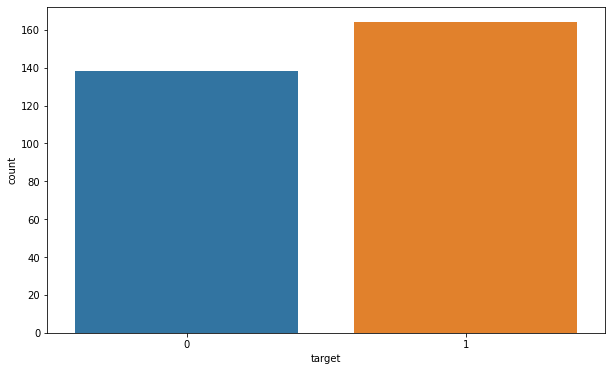

In [31]:
sns.countplot(df['target']);

<AxesSubplot:>

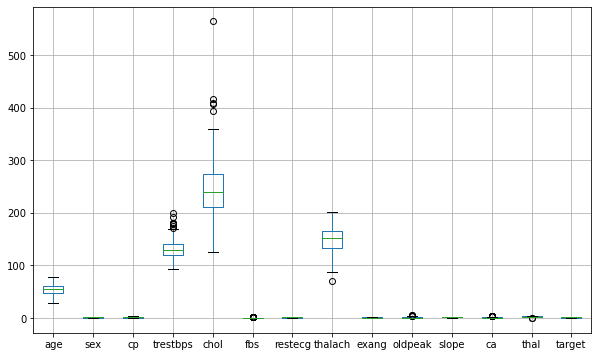

In [32]:
df.boxplot(column=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

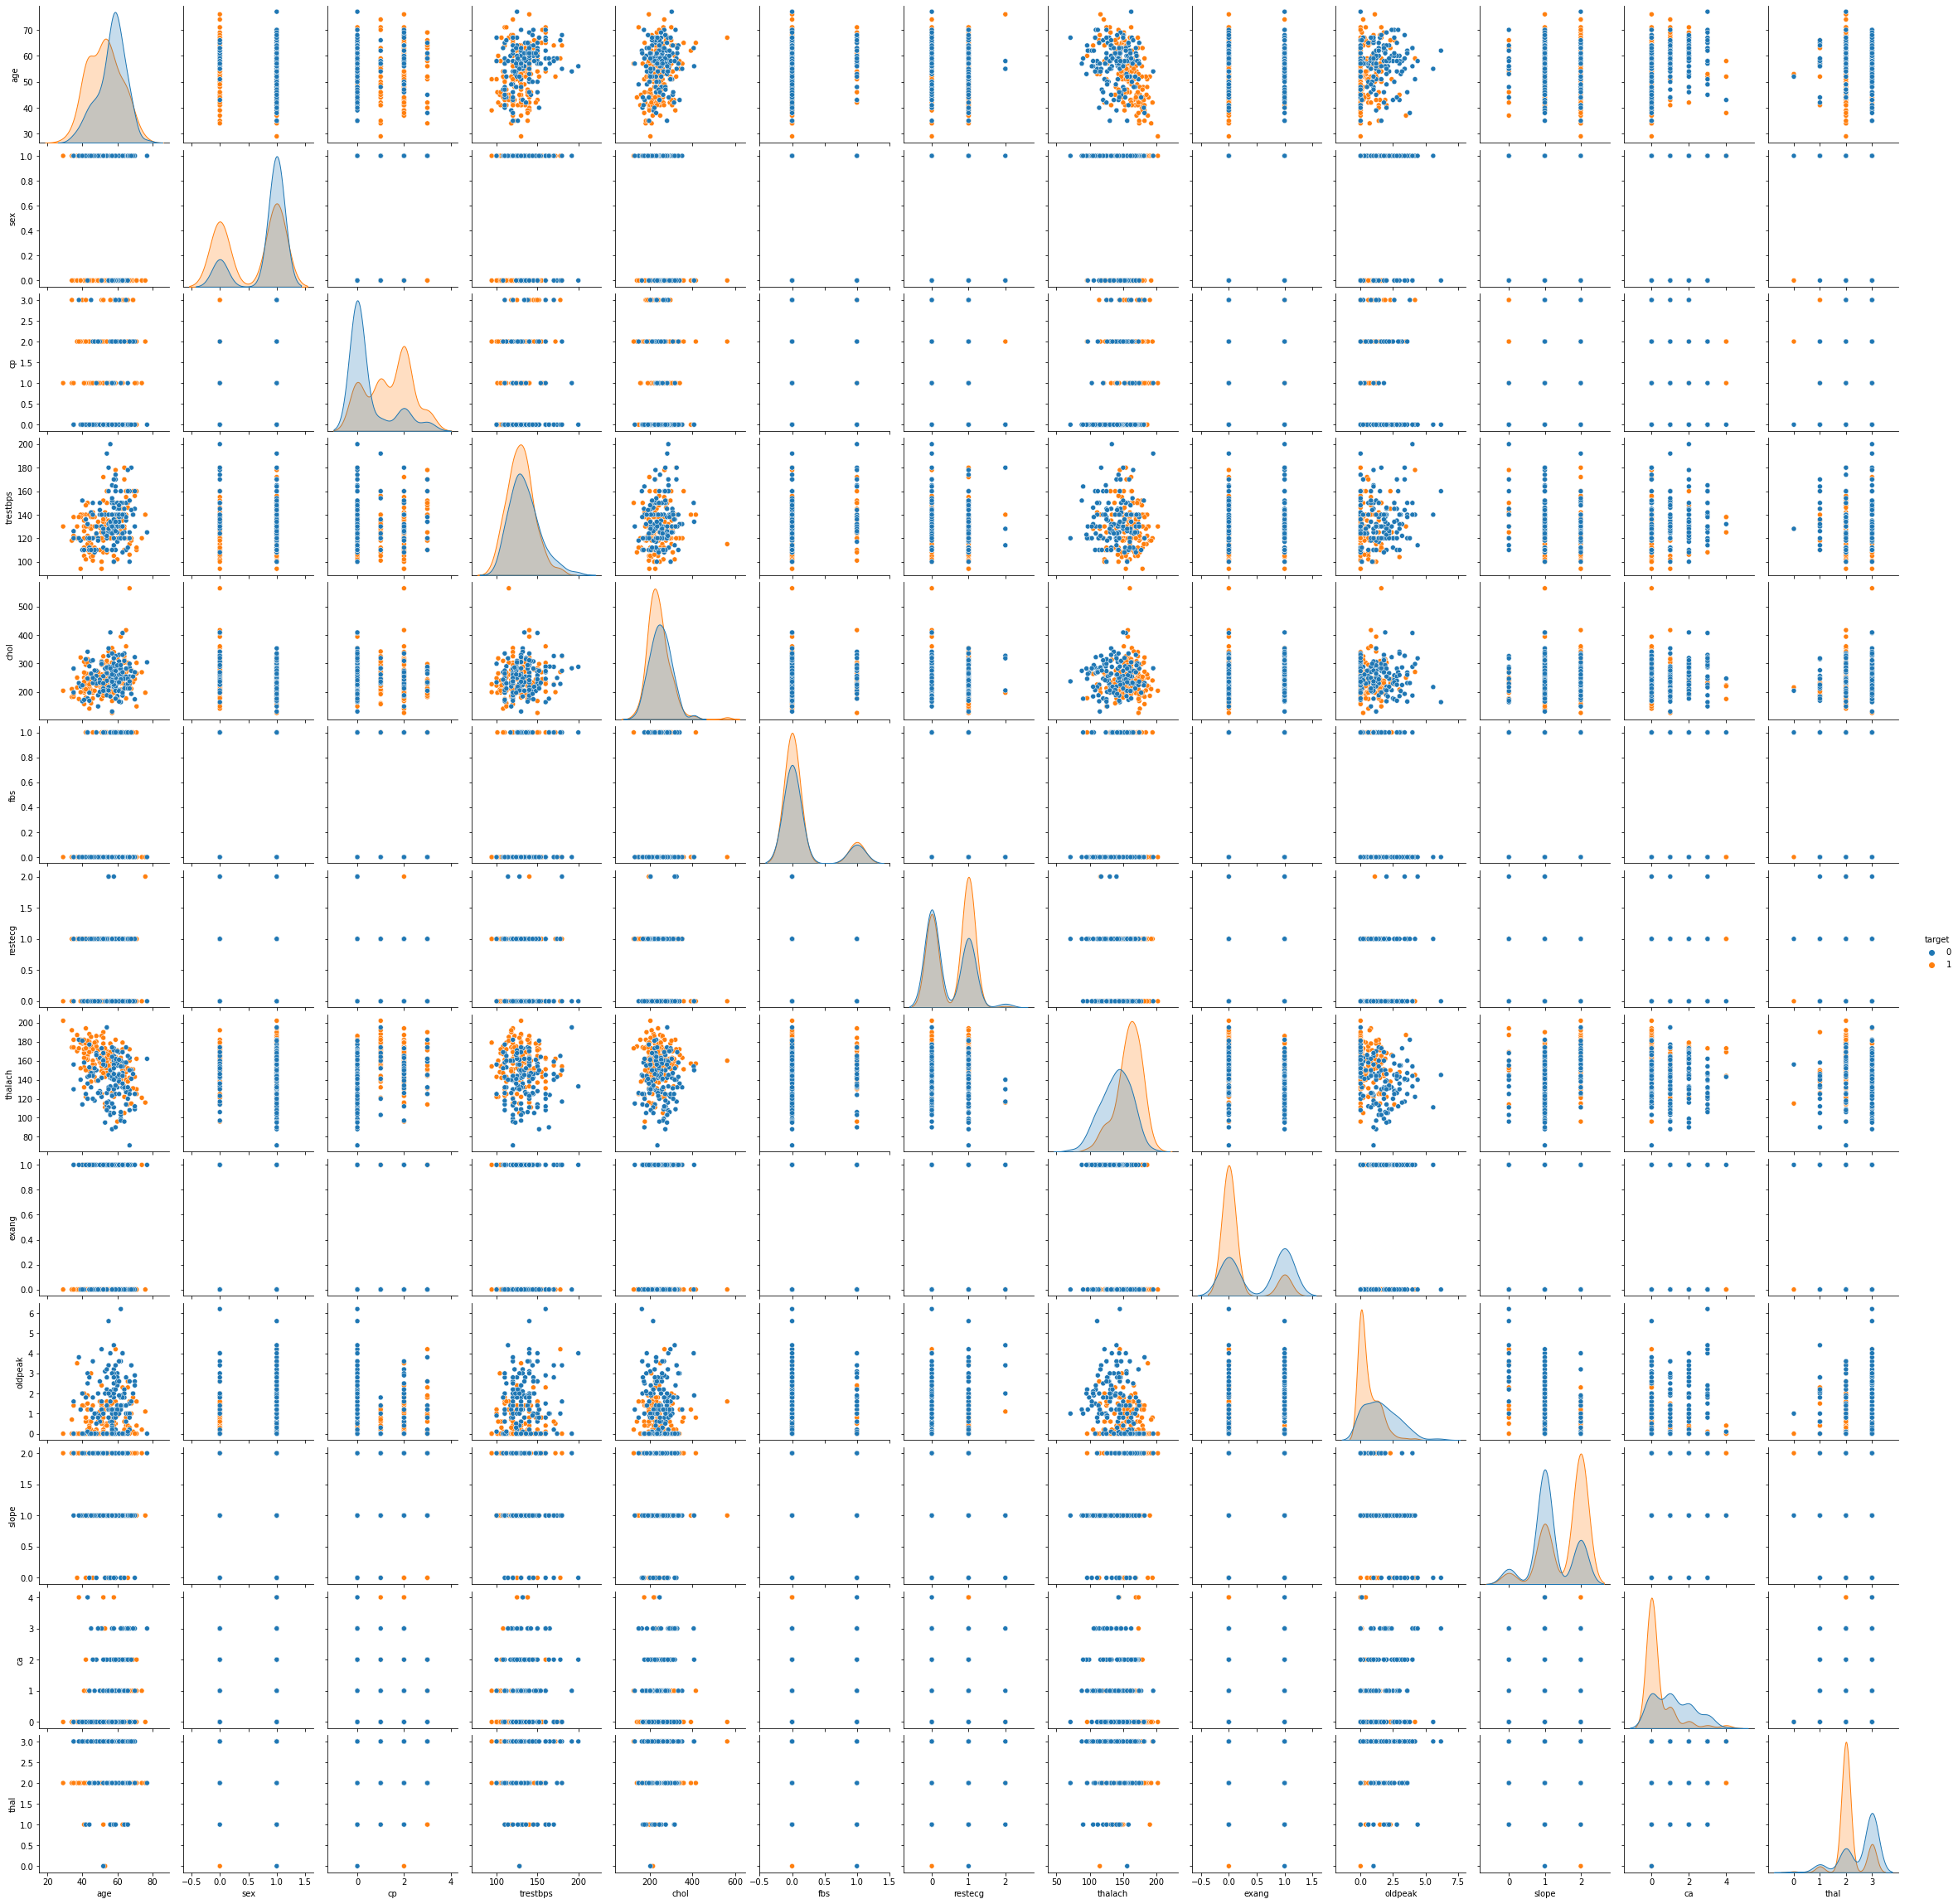

In [33]:
sns.pairplot(df, hue= "target")

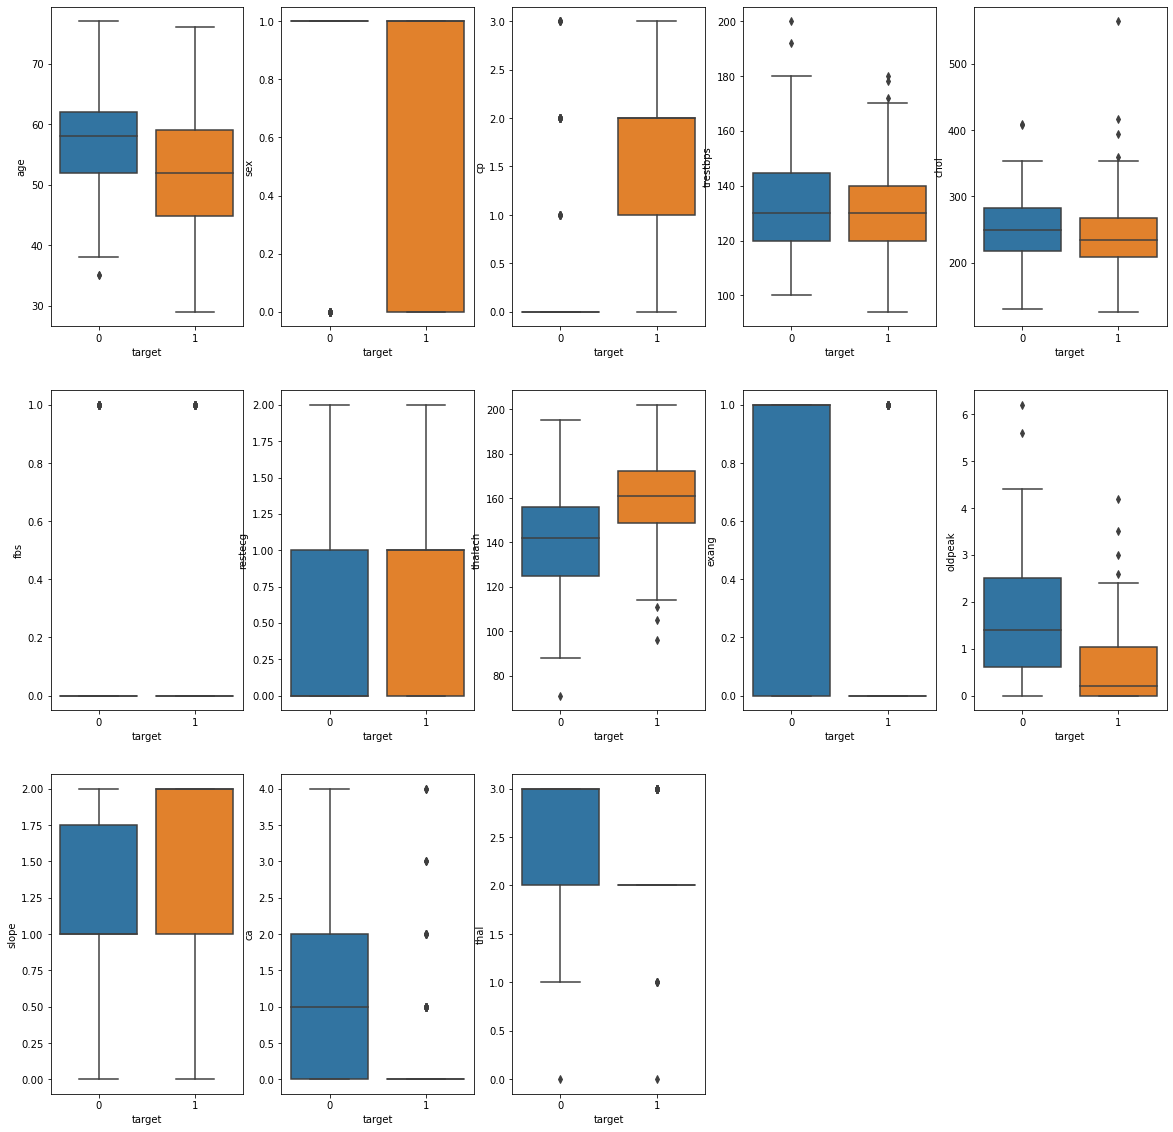

In [34]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(3,5,index)
        sns.boxplot(x='target',y=feature,data=df)

<AxesSubplot:>

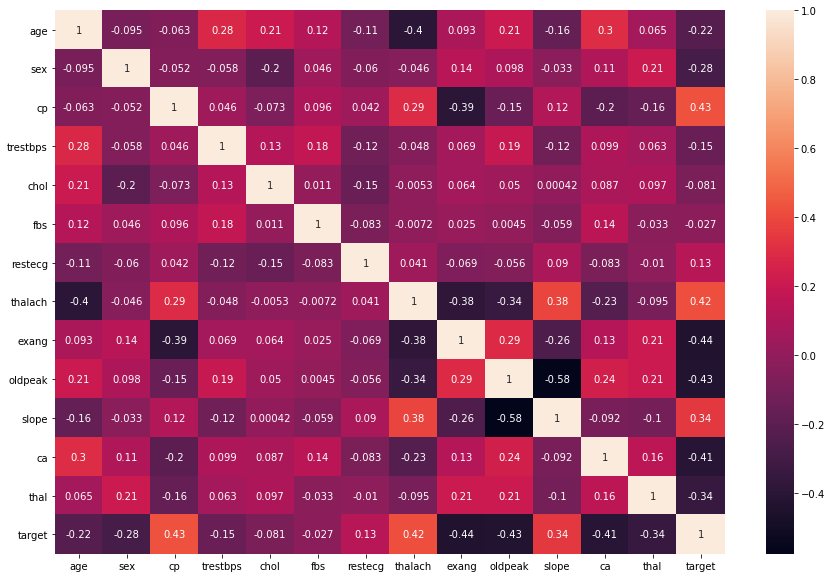

In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot = True)  # multicollinearity gözükmüyor.

# Data Preprocessing

In [36]:
X = df.drop("target", axis = 1)
y = df["target"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [39]:
X_train.shape

(256, 13)

In [40]:
X_test.shape

(46, 13)

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### With Default Parameters

In [44]:
log_model = LogisticRegression().fit(X_train_scaled,y_train)

In [45]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [46]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.12982409, 0.87017591],
       [0.22186168, 0.77813832],
       [0.30913714, 0.69086286],
       [0.05219793, 0.94780207],
       [0.9510535 , 0.0489465 ],
       [0.19894494, 0.80105506],
       [0.11763491, 0.88236509],
       [0.95139659, 0.04860341],
       [0.82941324, 0.17058676],
       [0.27154578, 0.72845422],
       [0.70757   , 0.29243   ],
       [0.35294164, 0.64705836],
       [0.29429288, 0.70570712],
       [0.67618854, 0.32381146],
       [0.10180249, 0.89819751],
       [0.30251482, 0.69748518],
       [0.03532121, 0.96467879],
       [0.31698501, 0.68301499],
       [0.30230916, 0.69769084],
       [0.9361527 , 0.0638473 ],
       [0.9303517 , 0.0696483 ],
       [0.82738463, 0.17261537],
       [0.47796625, 0.52203375],
       [0.76714053, 0.23285947],
       [0.90069482, 0.09930518],
       [0.07643196, 0.92356804],
       [0.94653102, 0.05346898],
       [0.23293034, 0.76706966],
       [0.94313688, 0.05686312],
       [0.13281106, 0.86718894],
       [0.

In [48]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [49]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[15  4]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.87      0.96      0.91        27

    accuracy                           0.89        46
   macro avg       0.90      0.88      0.88        46
weighted avg       0.90      0.89      0.89        46


Train_Set
[[ 92  27]
 [ 16 121]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       119
           1       0.82      0.88      0.85       137

    accuracy                           0.83       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.83      0.83       256



In [50]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred_proba"] = y_pred_proba[:,1] 
test_data["pred"] = y_pred

In [51]:
test_data.sample(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
70,54,1,2,120,258,0,0,147,0,0.400,1,0,3,1,0.649,1
266,49,1,2,118,149,0,0,126,0,0.800,2,3,2,0,0.534,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1,0.683,1
186,54,1,0,124,266,0,0,109,1,2.200,1,1,3,0,0.049,0
254,45,1,0,142,309,0,0,147,1,0.000,1,3,3,0,0.046,0
267,54,1,0,122,286,0,0,116,1,3.200,1,2,2,0,0.042,0
279,42,1,0,136,315,0,1,125,1,1.800,1,0,1,0,0.292,0
12,49,1,1,130,266,0,1,171,0,0.600,2,0,2,1,0.801,1
231,55,1,0,160,289,0,0,145,1,0.800,1,1,3,0,0.070,0
183,50,1,0,150,243,0,0,128,0,2.600,1,0,3,0,0.173,0


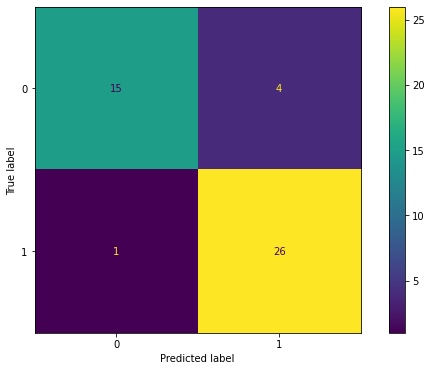

In [52]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

#### -ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [65]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

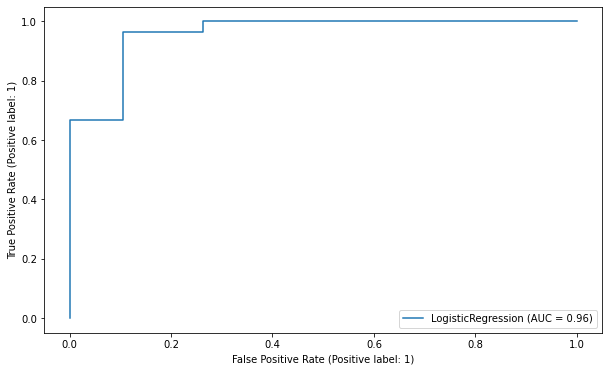

In [66]:
plot_roc_curve(log_model, X_test_scaled, y_test);

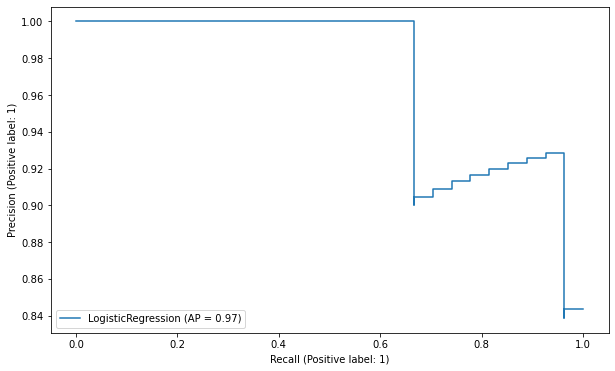

In [67]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

#### - Cross Validate

In [68]:
from sklearn.model_selection import cross_validate

In [69]:
model = LogisticRegression()  # veri dengeli oldugu için herhangi bir parametre kullanma gereksinimi duymadım.
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.817
test_precision   0.805
test_recall      0.876
test_f1          0.834
dtype: float64

#### - With Best Parameters (GridsearchCV)

In [70]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(0, 10, 20)  # C katsayısına logspace katsayıları koyuldugunda modelin daha iyi sonuçlar döndürüldügünü gözlemleriz.
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",  # istersek recall_0 = make_scorer(recall_score, pos_label =0) da bakabiliriz
                          n_jobs = -1)

In [71]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [72]:
grid_model.best_params_

{'C': 1.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [73]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1], dtype=int64)

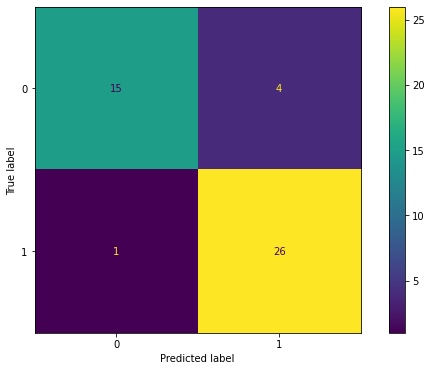

In [74]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [75]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[15  4]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.87      0.96      0.91        27

    accuracy                           0.89        46
   macro avg       0.90      0.88      0.88        46
weighted avg       0.90      0.89      0.89        46


Train_Set
[[ 92  27]
 [ 16 121]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       119
           1       0.82      0.88      0.85       137

    accuracy                           0.83       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.83      0.83       256



#### - Finding Best Threshold

- bu modelde bir imbalanced durumu olmadıgı için gridsearch yapılmamış model üzerinden best threshold hesaplamaya gerek yok.

In [84]:
# y_train

In [85]:
# y_pred_proba[:,1]

In [86]:
# y_pred_proba = log_model.predict_proba(X_train_scaled)  # traine göre th belirlesin ki leakage olmasın.
# roc_auc_score(y_train, y_pred_proba[:,1])

In [87]:
# fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [88]:
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

In [89]:
# y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
# print(confusion_matrix(y_test,y_pred2))
# print(classification_report(y_test,y_pred2))

In [90]:
# y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
# print(confusion_matrix(y_train, y_train_pred2))
# print(classification_report(y_train, y_train_pred2))

# Implement KNN and Evaluate

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(X_train_scaled,y_train)

# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 